In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import glob
import PIL.Image as Image

# pip install torchsummary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

print("Running on ", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

Running on  cuda


In [2]:
# data_path = '/dtu/datasets1/02514/PH2_Dataset_images'
# class PH2(torch.utils.data.Dataset):
#     def __init__(self, train, transform, data_path=data_path):
#         'Initialization'
#         self.transform = transform
#         # data_path = os.path.join(data_path, 'train' if train else 'test')
#         # self.image_paths = sorted(glob.glob(data_path + '/images/*.jpg'))
#         self.image_paths = sorted(glob.glob(data_path + '/***/**_lesion/*.bmp'))

     

        
#     def __len__(self):
#         'Returns the total number of samples'
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         'Generates one sample of data'
#         image_path = self.image_paths[idx]
#         # label_path = self.label_paths[idx]
        
#         image = Image.open(image_path)
#         # label = Image.open(label_path)
#         # Y = self.transform(label)
#         X = self.transform(image)
#         return X

In [3]:
# size = 128
# train_transform = transforms.Compose([transforms.Resize((size, size)), 
#                                     transforms.ToTensor()])
# test_transform = transforms.Compose([transforms.Resize((size, size)), 
#                                     transforms.ToTensor()])

# batch_size = 6
# trainset = PH2(train=True, transform=train_transform)
# train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
# testset = PH2(train=False, transform=test_transform)
# test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)

In [4]:
# print('Loaded %d training images' % len(trainset))
# print('Loaded %d test images' % len(testset))

In [5]:
# plt.rcParams['figure.figsize'] = [18, 6]

# images = next(iter(train_loader))

# for i in range(6):
#     plt.subplot(2, 6, i+1)
#     plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))

#     # plt.subplot(2, 6, i+7)
#     # plt.imshow(labels[i].squeeze())
# plt.show()

In [10]:
data_path = '/dtu/datasets1/02514/DRIVE/training'
class DRIVE(torch.utils.data.Dataset):
    def __init__(self,  train = True, transform = None, data_path=data_path, *args, **kwargs):
        'Initialization'
        self.transform = transform
        self.train = train
        self.datapath = data_path
        # data_path = os.path.join(data_path, 'training' if train else 'test')
        self.image_paths = sorted(glob.glob(data_path + '/images/*.tif'))
        self.mask_paths = sorted(glob.glob(data_path + '/mask/*.gif'))

        # call super
        super().__init__(self.data_path, transform=transform, *args, **kwargs)

        # split train and val
        if self.train:
            self.train_subset, self.val_subset, self.test = torch.utils.data.random_split(
        self, [0.7, 0.2, 0.1], generator=torch.Generator().manual_seed(1))
        
    def __len__(self):
        'Returns the total number of samples'
        return len(self.image_paths)

    def __getitem__(self, idx):
        'Generates one sample of data'
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        
        image = Image.open(image_path)
        mask = Image.open(mask_path)
        Y = self.transform(mask)
        X = self.transform(image)
        return X, Y

In [11]:
size = 128
train_transform = transforms.Compose([transforms.Resize((size, size)), 
                                    transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize((size, size)), 
                                    transforms.ToTensor()])

batch_size = 6
trainset = DRIVE( transform=train_transform)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)

# testset = DRIVE(train=False, transform=test_transform)
# test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)

AttributeError: 'DRIVE' object has no attribute 'data_path'

In [4]:
print('Loaded %d training images' % len(trainset))
# print('Loaded %d test images' % len(testset))

Loaded 20 training images


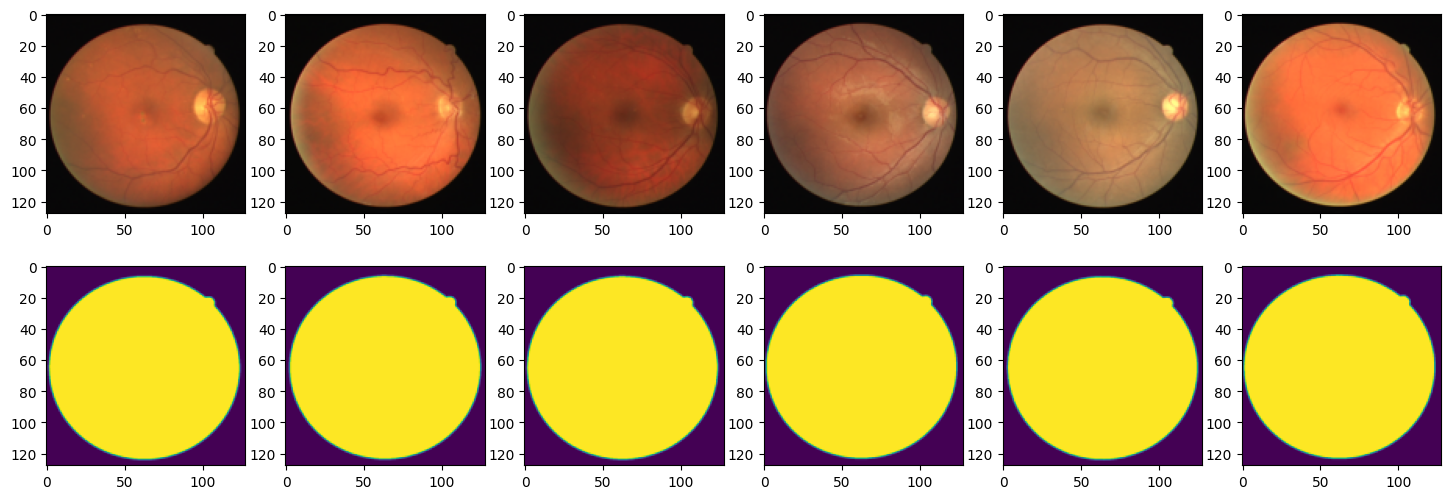

In [5]:
plt.rcParams['figure.figsize'] = [18, 6]

images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
plt.show()

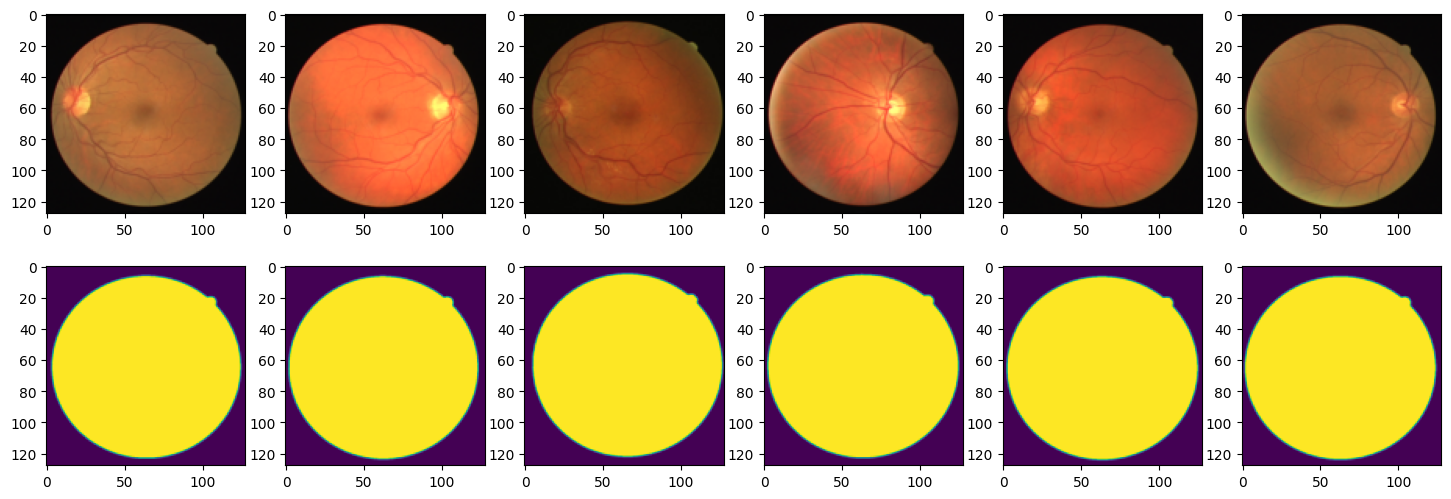

In [82]:
plt.rcParams['figure.figsize'] = [18, 6]

images, labels = next(iter(test_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
plt.show()